In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
voter_2020 = pd.read_csv('files/november2020_voterData.csv')
gov_2020 = pd.read_csv('files/2020govwrace.csv')
gov_2020 = gov_2020.drop(gov_2020.columns[0], axis=1)
pre_2020 = pd.read_csv('files/2020preswrace.csv')
pre_2020 = pre_2020.drop(pre_2020.columns[0], axis=1)

voter_2020 = voter_2020.drop(voter_2020.columns[0], axis=1)
voter_2020.head()


,county_desc,election_date,party_cd,race_code,ethnic_code,sex_code,age,total_voters
0,IREDELL,11/03/2020,DEM,Undesignated,HL,M,41-65,1
1,GUILFORD,11/03/2020,LIB,White,NL,M,18-25,1
2,WAKE,11/03/2020,REP,White,UN,F,41-65,12
3,MOORE,11/03/2020,UNA,Undesignated,UN,U,26-40,6
4,WAKE,11/03/2020,UNA,Asian,NL,F,26-40,8


In [34]:
#A bit more data cleaning 2020 voter data
'''
voter_2020 = pd.read_csv('files/november2020_voterData.csv', header=0)
voter_2020 = voter_2020.drop(["vtd_abbrv","stats_type", "update_date", 'precinct_abbrv', 'Unnamed: 0'], axis = 1)
voter_2020 = voter_2020.replace('Age 18 - 25', '18-25')
voter_2020 = voter_2020.replace('Age 26 - 40', '26-40')
voter_2020 = voter_2020.replace('Age 41 - 65', '41-65')
voter_2020 = voter_2020.replace('Age Over 66', '66+')
voter_2020 = voter_2020[voter_2020["age"] != "Age < 18 Or Invalid Birth Dates"]
voter_2020 = voter_2020.drop([0])
voter_2020.head()
voter_2020.to_csv('november2020_voterData.csv')
'''

{'BRUNSWICK', 'FORSYTH', 'WILKES', 'AVERY', 'CRAVEN', 'LEE', 'STANLY', 'WATAUGA', 'FRANKLIN', 'JACKSON', 'HOKE', 'BEAUFORT', 'DURHAM', 'WILSON', 'YADKIN', 'HENDERSON', 'CLAY', 'LINCOLN', 'PERQUIMANS', 'CLEVELAND', 'CURRITUCK', 'HYDE', 'GREENE', 'SWAIN', 'BLADEN', 'LENOIR', 'JONES', 'MACON', 'ONSLOW', 'ALAMANCE', 'CABARRUS', 'CUMBERLAND', 'GATES', 'CASWELL', 'ROBESON', 'BERTIE', 'HARNETT', 'GRAHAM', 'ANSON', 'CHOWAN', 'JOHNSTON', 'UNION', 'NASH', 'WAKE', 'GUILFORD', 'RICHMOND', 'NORTHAMPTON', 'PITT', 'DUPLIN', 'CHEROKEE', 'GRANVILLE', 'ROCKINGHAM', 'SURRY', 'MECKLENBURG', 'IREDELL', 'PENDER', 'YANCEY', 'DAVIE', 'SCOTLAND', 'ASHE', 'DARE', 'ORANGE', 'PASQUOTANK', 'CALDWELL', 'BUNCOMBE', 'MOORE', 'TRANSYLVANIA', 'PAMLICO', 'CARTERET', 'POLK', 'STOKES', 'TYRRELL', 'WAYNE', 'RUTHERFORD', 'DAVIDSON', 'WASHINGTON', 'PERSON', 'RANDOLPH', 'CAMDEN', 'ROWAN', 'HAYWOOD', 'MONTGOMERY', 'GASTON', 'ALLEGHANY', 'MITCHELL', 'SAMPSON', 'ALEXANDER', 'COLUMBUS', 'MARTIN', 'CATAWBA', 'CHATHAM', 'WARREN', '

In [ ]:
#a bit more cleaning 2016 voter data, to come


In [2]:
#Cleaning for Predictions, voter_demographics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
"""print(set(voter_2020['sex_code']))
print(set(voter_2020['ethnic_code']))
print(set(voter_2020['race_code']))
print(set(voter_2020['age']))
print(set(voter_2020['party_cd']))
print(set(voter_2020['election_date']))"""
voter_2020 = voter_2020[(voter_2020['sex_code'] != 'U') &
(voter_2020['race_code'] != 'Undesignated') & (voter_2020['age'] != 'Invalid Birth Dates') & 
(voter_2020['party_cd'] != 'UNA')]
voter_2020 = voter_2020.dropna(subset=['race_code'])
#print(len(voter_2020))

print(set(voter_2020['race_code']))

data = OneHotEncoder().fit_transform(voter_2020[['sex_code', 'county_desc', 'age', 'party_cd']].values).toarray()
target = voter_2020['race_code']



{'Other', 'Indian American', 'White', 'Asian', 'Black', 'Biracial'}


In [3]:
# predicting county by sex, race, party, age
#test_split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)



In [4]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

KeyboardInterrupt: 

In [5]:
gov_votes = pd.read_csv('files/2020gov_county_votes.csv')
gov_votes = gov_votes.drop(gov_votes.columns[0], axis=1)
voter_2020_rename = voter_2020.rename(columns={"county_desc": "County"})
gov_votes = gov_votes.set_index('County').join(voter_2020_rename.set_index('County'))
data = OneHotEncoder().fit_transform(gov_votes[['sex_code', 'race_code', 'age', 'party_cd']].values).toarray()
target = gov_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)


0.5599046384968921


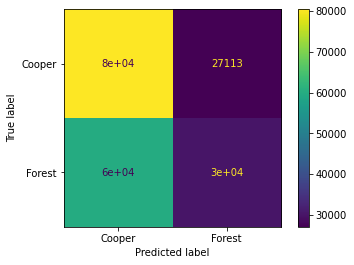

In [ ]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [7]:
pres_votes = pd.read_csv('files/2020pres_county_votes.csv')
pres_votes = pres_votes.drop(pres_votes.columns[0], axis=1)
pres_votes = pres_votes.set_index('County').join(voter_2020_rename.set_index('County'))
data = OneHotEncoder().fit_transform(pres_votes[['sex_code', 'race_code', 'age', 'party_cd']].values).toarray()
target = pres_votes['election_winner']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)


In [ ]:
#Logistic Modelling
#run logistic model, get score, plot confusion matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X = train_data, y = train_target)
predicted_train = logistic_model.predict(test_data)


score = logistic_model.score(test_data, test_target)

print(score)
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)